In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("soccer-standings.csv", index_col=0);
print(df)

                        Rank   P   M   W   D   L   G  GA  GD  Rank.1  ...  \
Team                                                                  ...   
Liverpool                  1  84  38  25   9   4  86  41  45       1  ...   
Arsenal                    2  74  38  20  14   4  69  34  35       5  ...   
Manchester City            3  71  38  21   8   9  72  44  28       2  ...   
Chelsea                    4  69  38  20   9   9  64  43  21       3  ...   
Newcastle United           5  66  38  20   6  12  68  47  21       6  ...   
Aston Villa                6  66  38  19   9  10  58  51   7       4  ...   
Nottingham Forest          7  65  38  19   8  11  58  46  12       7  ...   
Brighton & Hove Albion     8  61  38  16  13   9  66  59   7       8  ...   
AFC Bournemouth            9  56  38  15  11  12  58  46  12      10  ...   
Brentford                 10  56  38  16   8  14  66  57   9       9  ...   
Fulham                    11  54  38  15   9  14  54  54   0      11  ...   

In [3]:
l=df[["W", "L"]]
print(l)

                         W   L
Team                          
Liverpool               25   4
Arsenal                 20   4
Manchester City         21   9
Chelsea                 20   9
Newcastle United        20  12
Aston Villa             19  10
Nottingham Forest       19  11
Brighton & Hove Albion  16   9
AFC Bournemouth         15  12
Brentford               16  14
Fulham                  15  14
Crystal Palace          13  11
Everton                 11  12
West Ham United         11  17
Manchester United       11  18
Wolverhampton           12  20
Tottenham Hotspur       11  22
Leicester City           6  25
Ipswich Town             4  24
Southampton              2  30


In [4]:
def half(n):
    if n>14:
        return 1
    else:
        return -1

l["Half"]=l["W"].apply(half)
print(l)

                         W   L  Half
Team                                
Liverpool               25   4     1
Arsenal                 20   4     1
Manchester City         21   9     1
Chelsea                 20   9     1
Newcastle United        20  12     1
Aston Villa             19  10     1
Nottingham Forest       19  11     1
Brighton & Hove Albion  16   9     1
AFC Bournemouth         15  12     1
Brentford               16  14     1
Fulham                  15  14     1
Crystal Palace          13  11    -1
Everton                 11  12    -1
West Ham United         11  17    -1
Manchester United       11  18    -1
Wolverhampton           12  20    -1
Tottenham Hotspur       11  22    -1
Leicester City           6  25    -1
Ipswich Town             4  24    -1
Southampton              2  30    -1


/tmp/ipykernel_6018/2933508189.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l["Half"]=l["W"].apply(half)


In [5]:
print(l)

                         W   L  Half
Team                                
Liverpool               25   4     1
Arsenal                 20   4     1
Manchester City         21   9     1
Chelsea                 20   9     1
Newcastle United        20  12     1
Aston Villa             19  10     1
Nottingham Forest       19  11     1
Brighton & Hove Albion  16   9     1
AFC Bournemouth         15  12     1
Brentford               16  14     1
Fulham                  15  14     1
Crystal Palace          13  11    -1
Everton                 11  12    -1
West Ham United         11  17    -1
Manchester United       11  18    -1
Wolverhampton           12  20    -1
Tottenham Hotspur       11  22    -1
Leicester City           6  25    -1
Ipswich Town             4  24    -1
Southampton              2  30    -1


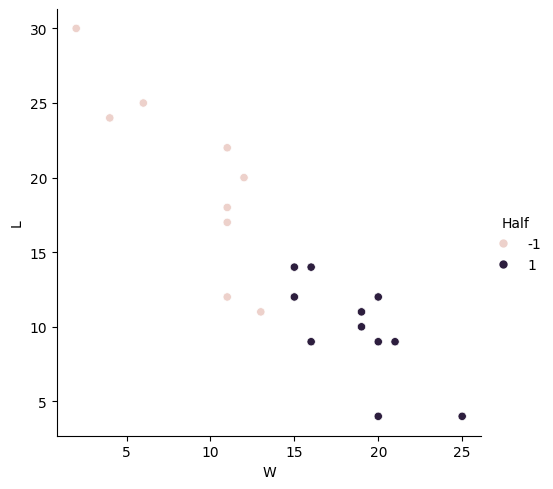

In [6]:
sns.relplot(x=l["W"], y=l["L"], hue=l["Half"])

In [7]:
X=l[["W", "L"]]
y=l["Half"]

print(X)
print(y)

                         W   L
Team                          
Liverpool               25   4
Arsenal                 20   4
Manchester City         21   9
Chelsea                 20   9
Newcastle United        20  12
Aston Villa             19  10
Nottingham Forest       19  11
Brighton & Hove Albion  16   9
AFC Bournemouth         15  12
Brentford               16  14
Fulham                  15  14
Crystal Palace          13  11
Everton                 11  12
West Ham United         11  17
Manchester United       11  18
Wolverhampton           12  20
Tottenham Hotspur       11  22
Leicester City           6  25
Ipswich Town             4  24
Southampton              2  30
Team
Liverpool                 1
Arsenal                   1
Manchester City           1
Chelsea                   1
Newcastle United          1
Aston Villa               1
Nottingham Forest         1
Brighton & Hove Albion    1
AFC Bournemouth           1
Brentford                 1
Fulham                    1
Cryst

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25)
print(X_train)

                    W   L
Team                     
AFC Bournemouth    15  12
Aston Villa        19  10
West Ham United    11  17
Leicester City      6  25
Ipswich Town        4  24
Newcastle United   20  12
Southampton         2  30
Manchester United  11  18
Everton            11  12
Arsenal            20   4
Tottenham Hotspur  11  22
Fulham             15  14
Nottingham Forest  19  11
Brentford          16  14
Liverpool          25   4


In [9]:
from sklearn import svm

model = svm.SVC(kernel="linear")
classifier=model.fit(X_train, y_train)

In [10]:
y_pred=classifier.predict(X_test)
print(y_test)
print(y_pred)

Team
Brighton & Hove Albion    1
Crystal Palace           -1
Manchester City           1
Wolverhampton            -1
Chelsea                   1
Name: Half, dtype: int64
[ 1 -1  1 -1  1]


In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ACCURACY: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

[[2 0]
 [0 3]]
ACCURACY:  1.0
